# Data Visualization

Visualization is often the easiest way to answer real-world questions with data. Today, we'll be answering questions about a dog breed dataset using visualization.

Dataset source: https://informationisbeautiful.net/visualizations/best-in-show-whats-the-top-data-dog/
* datadog: datadog score
* popularity: popularity ranking, 1=most popular
* longevity: life expectancy (years)
* ailments: number of congenital ailments
* grooming: grooming required once overy data/week/...
* kids: suitability for childern (high/medium/low)

First, let's load the data into R. The code below downloads the data from GitHub to Google Colab's runtime:

In [ ]:
system("git clone https://github.com/mtwatso2-eng/ANS128.git")

In order to load the data, you need to tell R where the data is. *Find the path to the folder where the data is.*

In [ ]:
"/content/ANS128/data/dogs_full.csv"

[1] "/content/ANS128/data/dogs_full.csv"

To access data in this folder without using the full path every time, we can set the working directory. *Fill in the following function with the data folder's path to set the working directory:*



In [ ]:
setwd("/content/ANS128/data/")

In [ ]:
list.files()

[1] "ANS128"                             "dogs_full.csv"                     
[3] "dogs_full.rds"                      "Lab00clover.txt"                   
[5] "Lab03HeiferData.csv"                "Lab8Cats.csv"                      
[7] "mice.csv"                           "MilkEx5_data.csv"                  
[9] "Pre-course survey (anonomized).csv"

In [ ]:
# read data
dogs = read.csv("dogs_full.csv")

In [ ]:
head(dogs)

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>
1,Border Collie,herding,3.64,45,39,20143,1,12.52,2,623,324,weekly,low,1,29,medium,NA,20
2,Border Terrier,terrier,3.61,80,61,22638,30,14.00,0,833,324,weekly,high,2,1,small,13.5,NA
3,Brittany,sporting,3.54,30,30,22589,19,12.92,0,618,466,weekly,medium,3,11,medium,35.0,19
4,Cairn Terrier,terrier,3.53,59,48,21992,35,13.84,2,435,324,weekly,high,4,2,small,14.0,10
5,Welsh Springer Spaniel,sporting,3.34,130,81,20224,31,12.49,1,750,324,weekly,high,5,4,medium,NA,18
6,English Cocker Spaniel,sporting,3.33,63,51,18993,18,11.66,0,800,324,weekly,high,6,5,medium,30.0,16


We'll use the ggplot2 package for data visualization:

# ggplot2 cheat sheet

https://rstudio.github.io/cheatsheets/data-visualization.pdf

# Answering questions with data visualization

Rather than going through everything in the packages, we'll focus on the questions we want to answer with the data.



*   How does dog popularity compare to owner-relevant metrics?
*   What dog breed groups are most popular?
*   What is the distribution of the datadog score?
*   Are any dog traits correlated with each other?


# How does dog popularity compare to owner-relevant metrics?

In [ ]:
# Get statistical summaries.
summary(dogs)

    breed              group              datadog      popularity_all  
 Length:172         Length:172         Min.   :0.990   Min.   :  1.00  
 Class :character   Class :character   1st Qu.:2.185   1st Qu.: 43.75  
 Mode  :character   Mode  :character   Median :2.710   Median : 87.50  
                                       Mean   :2.604   Mean   : 87.12  
                                       3rd Qu.:3.035   3rd Qu.:130.25  
                                       Max.   :3.640   Max.   :173.00  
                                       NA's   :85                      
   popularity   lifetime_cost   intelligence_rank   longevity    
 Min.   : 1.0   Min.   :12653   Min.   : 1.00     Min.   : 6.29  
 1st Qu.:22.5   1st Qu.:17816   1st Qu.:27.00     1st Qu.: 9.70  
 Median :44.0   Median :20087   Median :42.00     Median :11.29  
 Mean   :44.0   Mean   :19820   Mean   :40.92     Mean   :10.96  
 3rd Qu.:65.5   3rd Qu.:21798   3rd Qu.:54.25     3rd Qu.:12.37  
 Max.   :87.0   Max.   :2668

In [ ]:
# Other summary statistics.
?mean
?median
?sd
?var

In [ ]:
# Load a package (do every time you restart R)
library("ggplot2")

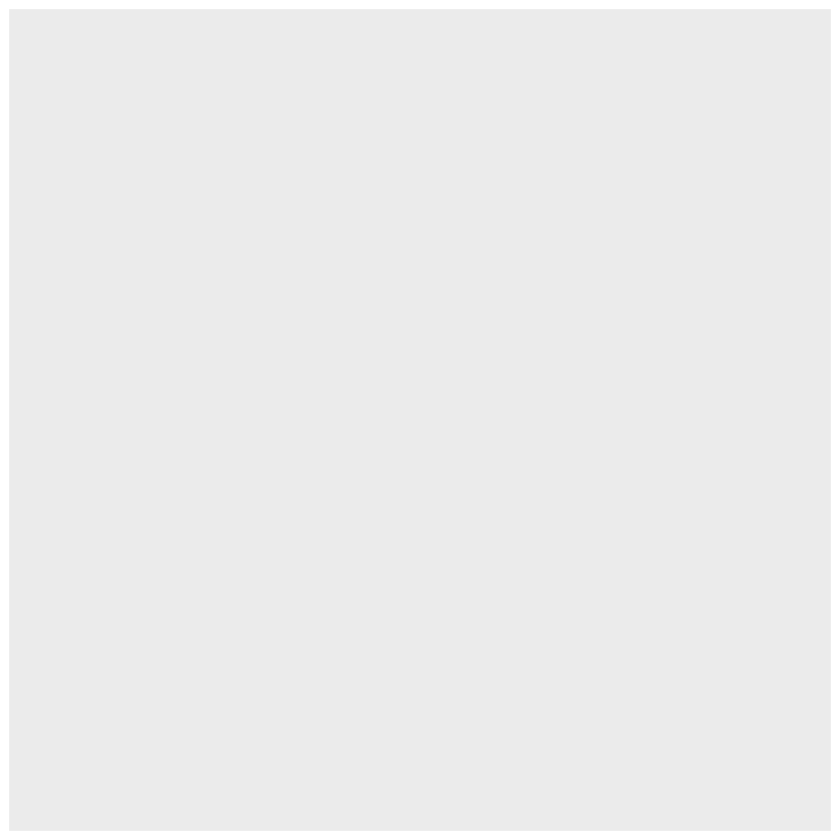

In [ ]:
# Grammar of Graphics --------------------
# Layer 1: Data
ggplot(data=dogs)

In [ ]:
# Layer 2: GEOMetry -- shapes to represent data
ggplot(data=dogs) + geom_point()

Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”


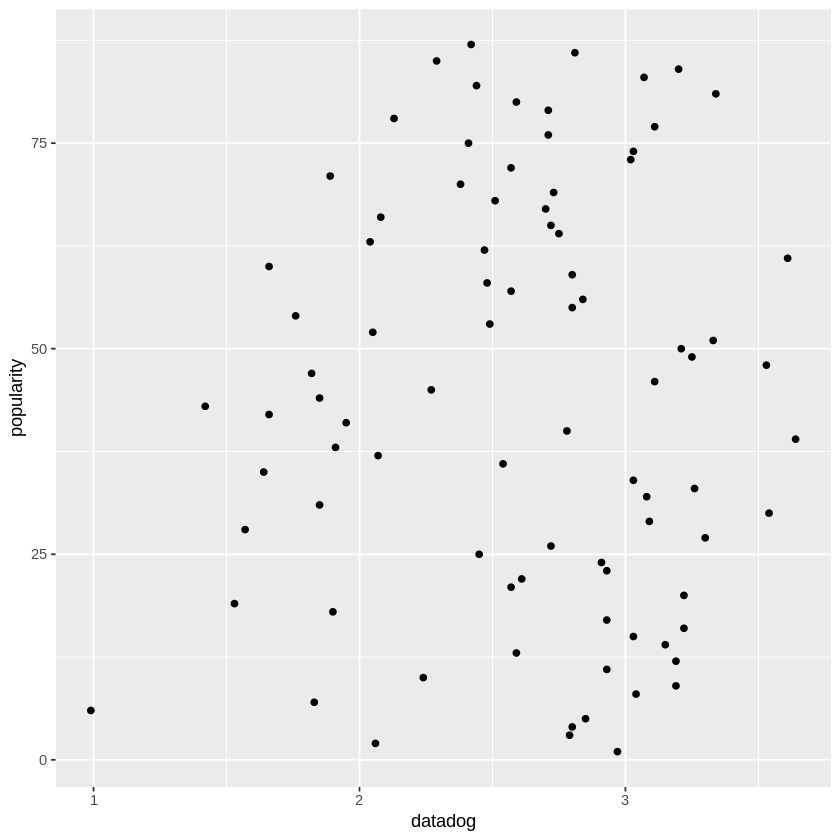

In [ ]:
# Layer 3: AESthetic -- "wires" between geometry and data
ggplot(data=dogs) + geom_point(aes(x = datadog, y = popularity))

Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”


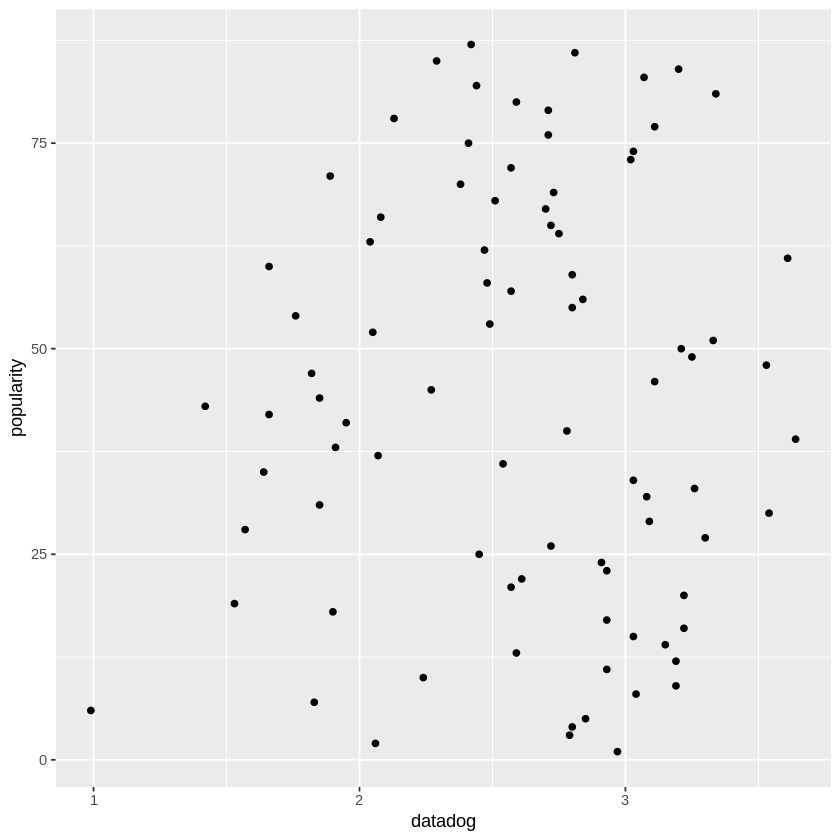

In [ ]:
#equivalently,
ggplot(data=dogs, aes(x = datadog, y = popularity)) +
  geom_point()

Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_text()`).”


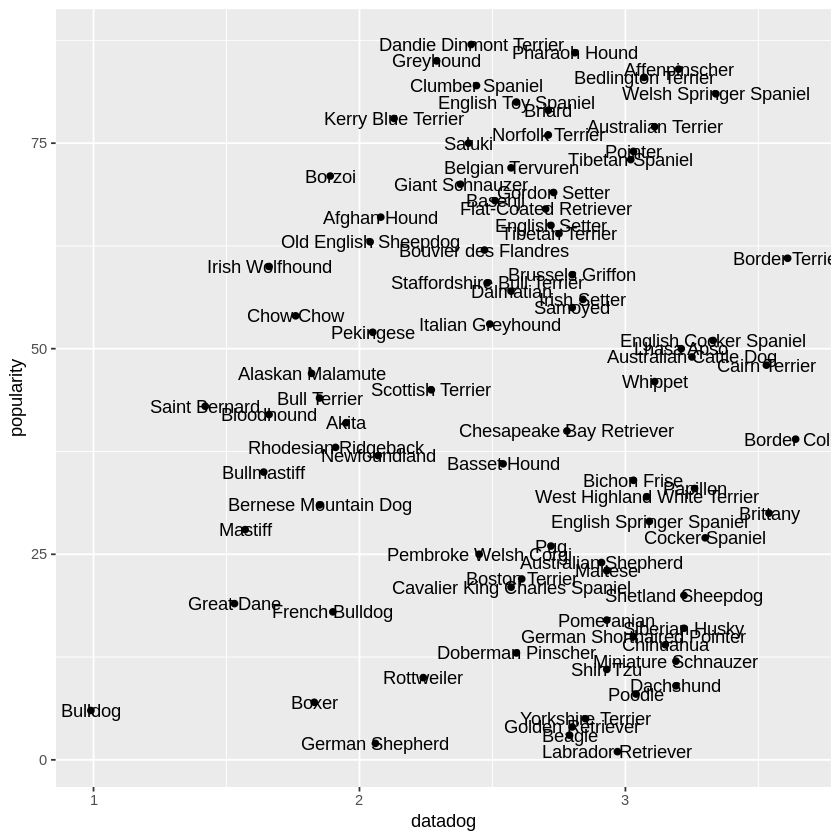

In [ ]:
# Add another geom to add breed names to the plot
ggplot(data=dogs, aes(x = datadog, y = popularity)) +
  geom_point() +
  geom_text(aes(label = breed))

Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_text()`).”


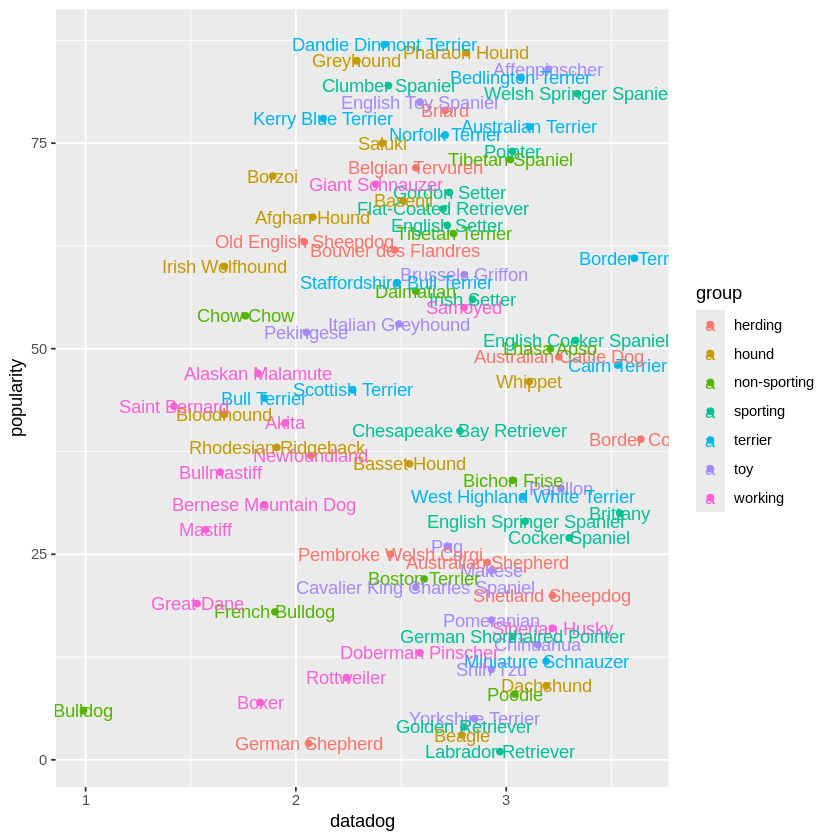

In [ ]:
# Add colors for each group
ggplot(dogs, aes(x = datadog, y = popularity, color = group)) +
  geom_point() +
  geom_text(aes(label = breed))

Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_text()`).”
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_text()`).”


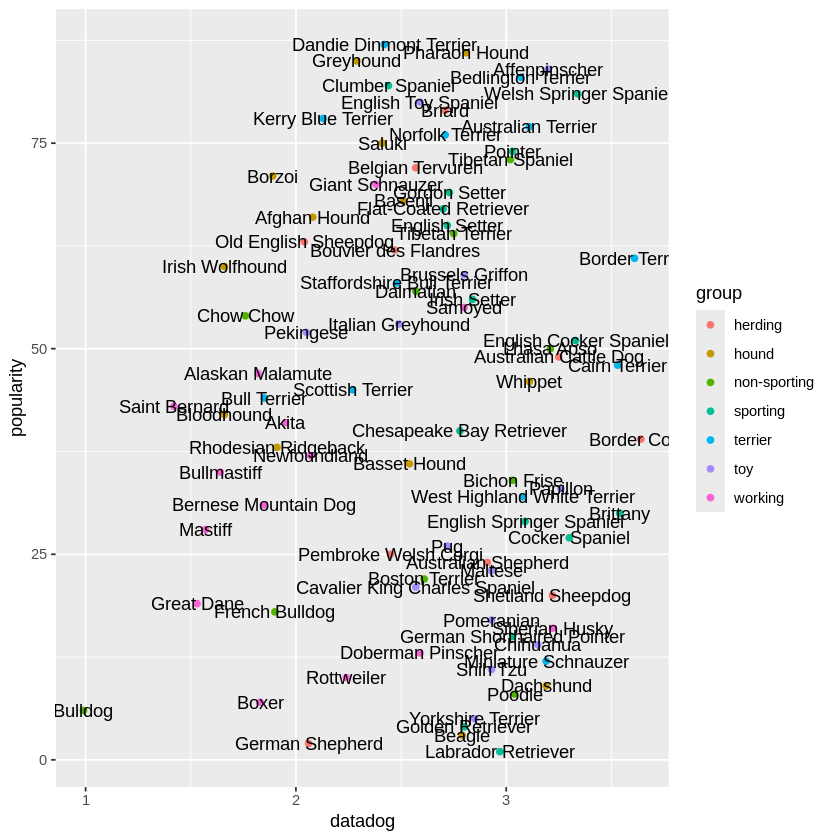

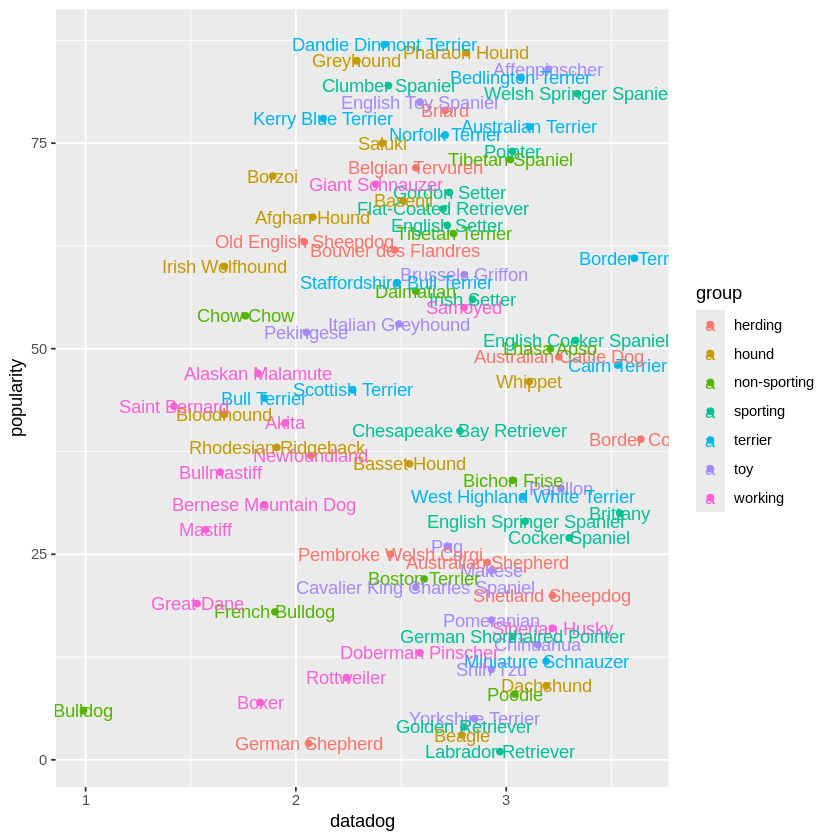

In [ ]:
# Depending on where we set the color aesthetic, color gets added to the
# points, the text, or both.
#add color to points:
ggplot(dogs, aes(x = datadog, y = popularity)) +
  geom_point(aes(color = group)) +
  geom_text(aes(label = breed))
#also add color to text:
ggplot(dogs, aes(x = datadog, y = popularity)) +
  geom_point(aes(color = group)) +
  geom_text(aes(label = breed,color = group))

Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_text()`).”


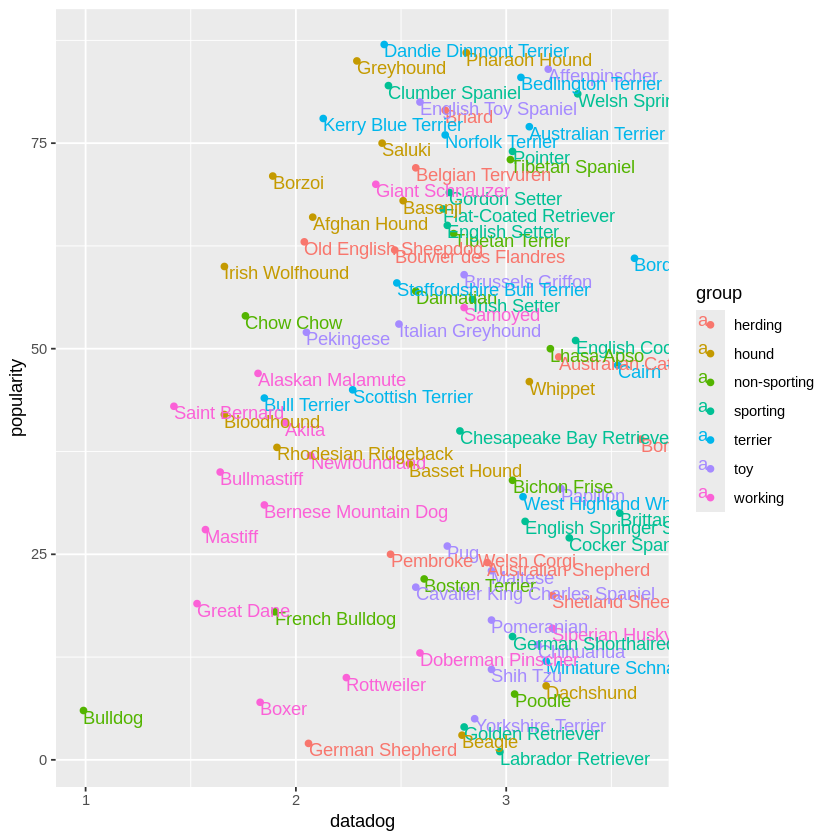

In [ ]:
# Adjust the text, so it's not on top of points
# you can modify text alignment with the vjust and hjust aesthetics. These can be
# a character ("left", "middle", "right", "bottom", "center", "top")

ggplot(dogs, aes(x = datadog, y = popularity, color = group)) +
  geom_point() +
  geom_text(aes(label = breed), hjust = "left", vjust = "top")

Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_text()`).”


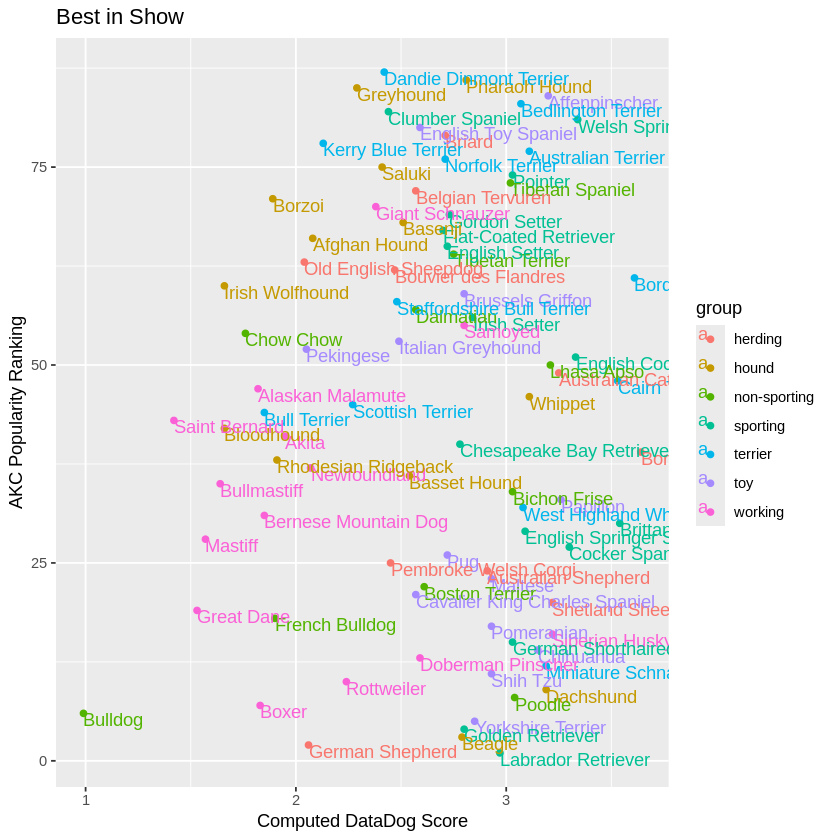

In [ ]:
# Layer 5: LABELS
ggplot(dogs, aes(x = datadog, y = popularity, color = group)) +
  geom_point() +
  geom_text(aes(label = breed), hjust = "left", vjust = "top") +
  labs(title = "Best in Show", x = "Computed DataDog Score",
       y = "AKC Popularity Ranking")

In [ ]:
# You can save the last plot you created to your working directory with:
ggsave("dogs_plot.png")

Saving 7 x 7 in image
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 85 rows containing missing values or values outside the scale range
(`geom_text()`).”


Using ggplot2, now answer the following questions. Use the [docs](https://rstudio.github.io/cheatsheets/data-visualization.pdf) to find the appropriate functions. You may also want to use data manipulation functions using dplyr:

https://nyu-cdsc.github.io/learningr/assets/data-transformation.pdf


*   What dog breed groups are most popular?

*   What is the distribution of the datadog score?

*   Are any dog traits correlated with each other?

# Extra credit

We use the results of your pre-course survey to decide what topics to put more effort into for this course. For extra credit, answer one of the following questions (or one you come up with!),

1.    *What topics are people the most interested in?*
2.   *What topics have the highest ratio of interest to familiarity (most worth learning)?*
3.  *Is interest or familiarity with any topic related to interest or familiarity in other topics?*

In [ ]:
require(tidyverse)
survey = read.csv("Pre-course survey (anonomized).csv")